# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')
library('ggplot2')
library('scales')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
df = read_csv('../Assignment//measles.csv')
df %>% head()

Parsed with column specification:
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)


index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here
df_vacc_rates = df %>% filter(mmr >= 0) %>% group_by(state) %>% summarize(greater_than_95 = sum(mmr >= 95))
    
df_vacc_rates

state,greater_than_95
Arizona,593
Arkansas,2
California,12639
Colorado,939
Connecticut,478
Illinois,6893
Maine,169
Massachusetts,826
Minnesota,755
Missouri,476


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
df_vacc_rates %>% arrange(greater_than_95) %>% head(1)

state,greater_than_95
Arkansas,2


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [5]:
df %>% 
    filter(state == 'North Carolina')

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297
2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281
3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403
4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704
5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820
6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674
7,North Carolina,2018-19,Alamance Christian,NA,NA,Alamance,NA,15,-1,100,NA,NA,NA,36.07537,-79.37108
8,North Carolina,2018-19,Alamance Elementary,NA,NA,Guilford,NA,79,-1,100,NA,NA,NA,36.01723,-79.70784
9,North Carolina,2018-19,Albemarle,NA,NA,Pasquotank,NA,15,-1,100,NA,NA,NA,36.27771,-76.28326
10,North Carolina,2018-19,Albert H Bangert Elementary,NA,NA,Craven,NA,70,-1,100,NA,NA,NA,35.08317,-77.08342


In [6]:
nc = df %>% 
    filter(state == 'North Carolina') %>% 
    select(name,overall) %>%
    arrange(overall) %>%
    mutate(rn = row_number(), fraction_of_school = rn / max(rn))
nc %>% head()

name,overall,rn,fraction_of_school
Renaissance Montessori Sch. of Cary,-1.0,1,0.0004796163
Annunciation Catholic,21.7,2,0.0009592326
Starmount Acad of Excellence,40.3,3,0.0014388489
Spruce Pine Montessori,42.9,4,0.0019184652
Moyock Elementary,43.5,5,0.0023980815
Liberty Christian,45.0,6,0.0028776978


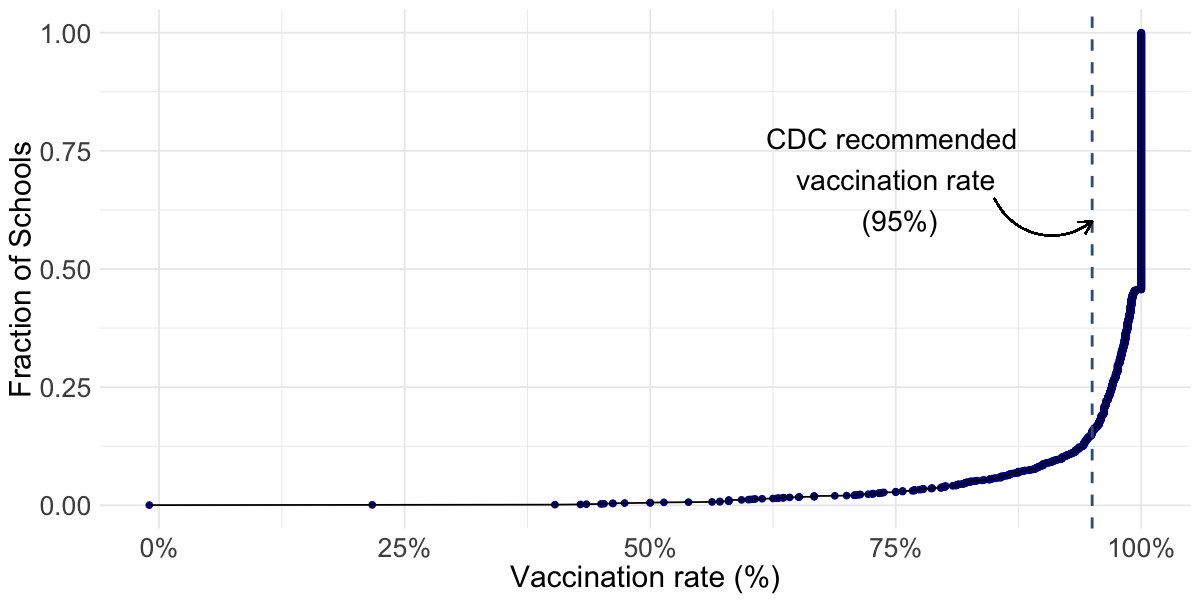

In [8]:
options(repr.plot.height = 5, repr.plot.width = 10)
p = ggplot(nc, aes(x = overall, y = fraction_of_school)) + 
    geom_point(color = 'blue4') +
    geom_line() +
    scale_x_continuous(labels = function(x) paste0(x , '%')) + 
    theme_minimal() +
    labs(x = 'Vaccination rate (%)', y = 'Fraction of Schools') +
    theme(axis.text=element_text(size=16),axis.title.x=element_text(size=18),axis.title.y=element_text(size=18)) +
    geom_vline(xintercept = 95,linetype = "dashed", lwd=0.8, colour = 'steelblue4') +
    annotate("text", x=75, y=0.69, label="CDC recommended \n vaccination rate \n (95%)",size = 6) +
    geom_curve(aes(x = 85, y = 0.65,xend = 95, yend = 0.6),
                       arrow = arrow(length = unit(0.3,'cm')))
#     geom_segment(aes(x = 80, y = 0.65,xend = 95, yend = 0.6),
#                 arrow = arrow(length = unit(0.5,'cm')))
    
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [258]:
df %>% 
    filter(state == 'North Carolina') %>%
    summarize(median = median(overall)) 

median
100


Yes, the median vaccination rate for NC schools above the CDC recommended target